In [12]:
import pandas as pd
import numpy as np
import os


In [13]:
cwd = os.getcwd()

liver_data_path = f"{cwd}\\data_primary\\FACS\\Liver-counts.csv"


In [14]:
df = pd.read_csv(liver_data_path)
df = df.rename({'Unnamed: 0': 'gene_name'}, axis=1)  # rename 1st column
df 

,gene_name,F18.MAA000377.3_9_M.1.1,J20.MAA000377.3_9_M.1.1,F19.MAA000377.3_9_M.1.1,J21.MAA000377.3_9_M.1.1,F20.MAA000377.3_9_M.1.1,J22.MAA000377.3_9_M.1.1,G11.MAA000377.3_9_M.1.1,K9.MAA000377.3_9_M.1.1,G13.MAA000377.3_9_M.1.1,...,A2.MAA100042.3_9_M.1.1,C4.MAA100042.3_9_M.1.1,A5.MAA100042.3_9_M.1.1,C6.MAA100042.3_9_M.1.1,A6.MAA100042.3_9_M.1.1,C7.MAA100042.3_9_M.1.1,A9.MAA100042.3_9_M.1.1,C9.MAA100042.3_9_M.1.1,A10.MAA100042.3_9_M.1.1,C10.MAA100042.3_9_M.1.1
0,0610005C13Rik,0,0,0,0,0,0,0,0,168,...,0,99,0,292,0,310,392,220,0,0
1,0610007C21Rik,0,0,0,0,2,58,1,0,0,...,0,753,0,630,1,768,527,129,0,0
2,0610007L01Rik,23,0,0,0,0,0,1,5,0,...,0,0,0,35,0,90,0,23,0,0
3,0610007N19Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0610007P08Rik,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23428,Zzef1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,98,0,0,0,0
23429,Zzz3,0,191,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23430,a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23431,l7Rn6,0,0,0,0,70,0,44,0,0,...,0,0,0,109,1,74,0,16,0,0


In [15]:
# new_df.set_index('gene_name') # change index 


In [16]:
singleGeneAmountThreshold = 10
new_df = df.drop(df.index[(df.iloc[:,1:].sum(axis = 1) < singleGeneAmountThreshold)]) # remove all that has 0 value in all column
new_df.reset_index(drop=True, inplace=True) # resetting all index
print(f"Matrix: {new_df.shape}")

Matrix: (15615, 982)


In [17]:
geneIndexs = []
miGeneCount = 0


for i in range(new_df.gene_name.size):
    if(new_df.gene_name[i][:3] == 'Mir'):
        geneIndexs.append(i)


print(f"total number of microRNAs count: {len(geneIndexs)}")
print(f"single gene total amount threshold: {singleGeneAmountThreshold}")

total number of microRNAs count: 100
single gene total amount threshold: 10


In [18]:
miRNA_bulk = new_df.iloc[geneIndexs]
mRNA_bulk = new_df.drop(geneIndexs)

print(f"miRNA_bulk Shape: {miRNA_bulk.shape}")
print(f"mRNA_bulk Shape: {mRNA_bulk.shape}")


miRNA_bulk Shape: (100, 982)
mRNA_bulk Shape: (15515, 982)


In [8]:
# miRNA_bulk.to_csv('data_primary/miRNA_bulk.csv')
# mRNA_bulk.to_csv('data_primary/mRNA_bulk.csv')

In [19]:
miRNA_bulk.index[(miRNA_bulk.iloc[:,1:].sum(axis = 1) >100)].shape

(23,)

In [10]:
# import matplotlib.pyplot as plt

# plt.imshow(corr, cmap='coolwarm')
# plt.colorbar()
# # plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
# # plt.yticks(range(len(corr.columns)), corr.columns)
# plt.show()


In [21]:
# new_df_T= new_df.set_index('gene_name')

# new_df_T = new_df_T.T

miRNA_bulk_T = miRNA_bulk.set_index('gene_name')
mRNA_bulk_T = mRNA_bulk.set_index('gene_name')

miRNA_bulk_T = miRNA_bulk_T.T
mRNA_bulk_T = mRNA_bulk_T.T

In [22]:
# mRNA_bulk_T[['0610005C13Rik', '0610007C21Rik']].corrwith(miRNA_bulk_T[['Mir100','Mir107']])
colM_count=0
colMi_count=0
corr_array = np.zeros([15515,100])

for colM in mRNA_bulk_T.columns.values:
    for colMi in miRNA_bulk_T.columns.values:
        corr = mRNA_bulk_T[colM].corr(miRNA_bulk_T[colMi])
        corr_array[colM_count,colMi_count]=corr
        colMi_count=colMi_count+1
    colMi_count=0
    colM_count=colM_count+1
    
        
           
        




In [38]:
import pylab

rows = 15515
columns = 100
fig = pylab.figure(figsize=(columns*0.01,rows*0.01))
pylab.figimage(corr_array,origin='lower')
fig.savefig("image.png")

<Figure size 100x15515 with 0 Axes>

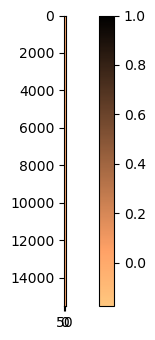

In [32]:
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [7.00, 3.50]

data2D = np.random.random((50, 50))
im = plt.imshow(corr_array, cmap="copper_r")
plt.colorbar(im)
plt.show()

In [35]:
corr_array.shape

(15515, 100)

In [ ]:
mRNA_bulk_T

gene_name,0610005C13Rik,0610007C21Rik,0610007L01Rik,0610007N19Rik,0610007P08Rik,0610007P14Rik,0610007P22Rik,0610008F07Rik,0610009B22Rik,0610009D07Rik,...,Zwint,Zxda,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,l7Rn6
F18.MAA000377.3_9_M.1.1,0,0,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,277,0,0,0
J20.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,33,...,90,0,0,0,0,46,202,0,191,0
F19.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,124,0,...,221,0,0,0,0,0,0,0,0,0
J21.MAA000377.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,2,0
F20.MAA000377.3_9_M.1.1,0,2,0,0,0,0,0,0,0,0,...,0,2,0,108,0,0,0,0,0,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C7.MAA100042.3_9_M.1.1,310,768,90,0,0,102,0,188,129,82,...,103,0,0,0,0,34,0,98,0,74
A9.MAA100042.3_9_M.1.1,392,527,0,0,0,98,0,0,263,57,...,0,0,0,0,0,0,0,0,0,0
C9.MAA100042.3_9_M.1.1,220,129,23,0,0,31,15,14,30,23,...,55,0,0,0,0,11,0,0,0,16
A10.MAA100042.3_9_M.1.1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
miRNA_col = [col for col in new_df_T if col.startswith('Mir')]


In [ ]:
new_df= new_df.set_index('gene_name')

In [ ]:
new_df = new_df.T

In [ ]:
len(miRNA_col)


100